In [1]:
# General
import pandas as pd
import numpy as np
from scipy.stats import skew

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Training models
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import learning_curve

# Tuning
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('Data/features_extracted.csv')
df

,is_free,total_recommendations,price,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,lang_Albanian,...,developers_6,developers_7,developers_8,developers_9,developers_10,developers_11,developers_12,developers_13,developers_14,developers_15
0,False,157570,999.0,8,1,1,1,6,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
1,False,21453,499.0,4,1,1,1,5,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000
2,False,102430,999.0,8,1,1,1,11,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
3,False,19364,999.0,8,1,1,1,4,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
4,False,15826,499.0,3,1,1,1,3,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90430,False,0,99.0,1,1,1,2,3,False,False,...,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000,0.000000,1.000000
90431,True,0,0.0,1,9,1,2,2,False,False,...,0.0,0.0,1.0,1.0,1.0,0.0,0.777778,0.555556,0.555556,0.444444
90432,False,0,499.0,8,1,1,2,8,False,False,...,1.0,1.0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000
90433,False,0,1399.0,3,1,1,2,2,False,False,...,1.0,1.0,0.0,0.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000


### Price Visualization

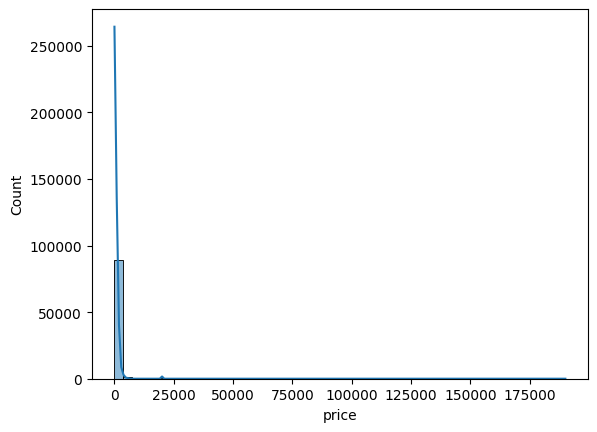

In [3]:
sns.histplot(df["price"], bins=50, kde=True)
plt.show()

The data is skewed to the right

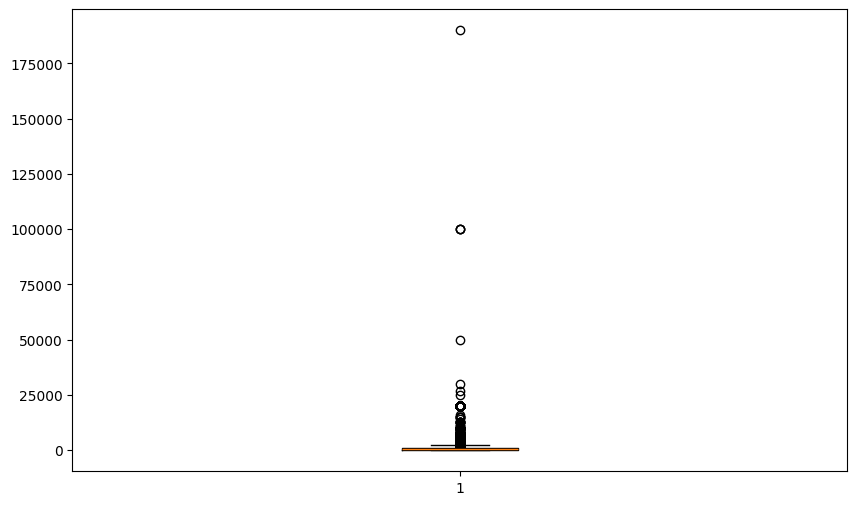

In [4]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["price"])
plt.show()

In [5]:
skewness_value = skew(df["price"])
print("Skewness:", skewness_value)

Skewness: 38.37542989988508


The data is highly skewed

### Log Transformation

Log transformation is used because the data is highly skewed. And np.log1p(x) is used instead of np.log(x) to handle where the games are free.

In [6]:
df['price_log'] = np.log1p(df['price'])

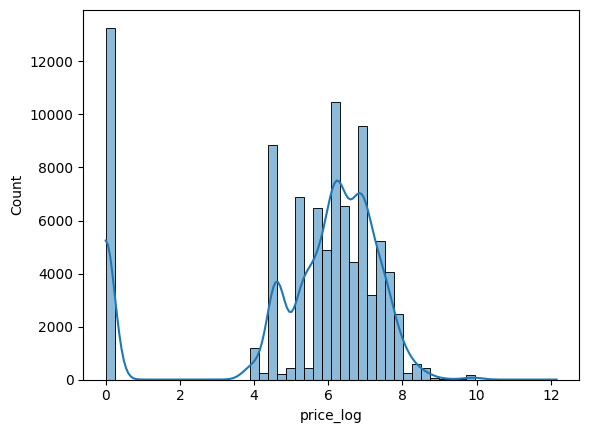

In [7]:
sns.histplot(df["price_log"], bins=50, kde=True)
plt.show()

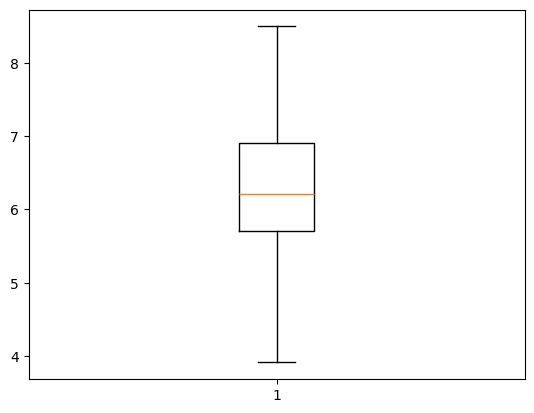

In [31]:
plt.boxplot(df["price_log"])
plt.show()

In [30]:
df = df[(df['price_log'] > 3.5) & (df['price_log'] < 8.5)]

### Feature Selection

In [32]:
correlation_matrix = df.drop(columns=['price']).corr()

In [33]:
target_correlation = correlation_matrix['price_log'].drop('price_log')
filtered_correlation = target_correlation[target_correlation.abs() > 0.2]

In [34]:
filtered_features = filtered_correlation.index.tolist()
filtered_df = df[filtered_features + ['price_log']]
filtered_correlation_matrix = filtered_df.corr()
filtered_correlation_matrix.columns

Index(['num_categories', 'gen_Casual', 'cat_Steam Cloud', 'price_log'], dtype='object')

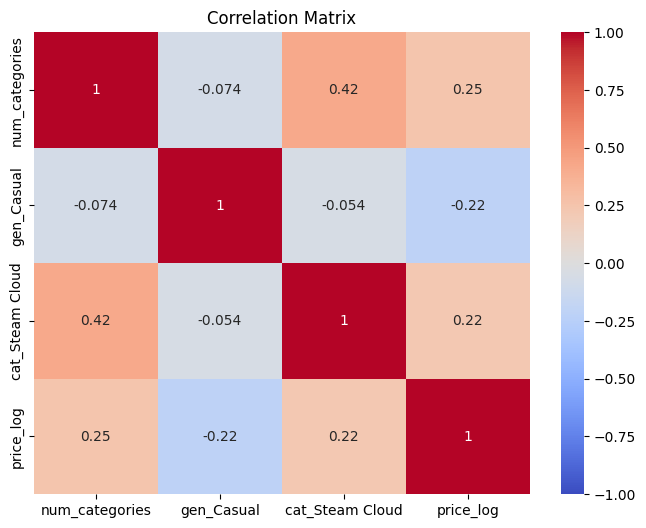

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [36]:
df_features = df

### Training

In [37]:
def train_eval(x_train, y_train, x_test, y_test, alpha=1):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    print(cross_val_score(model, X_test_scaled, y_test, cv=10, scoring='r2'))

In [38]:
x = df_features.drop(['price_log', 'price'], axis=1)
y = df_features['price_log']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [40]:
train_eval(x_train, y_train, x_train, y_train)
train_eval(x_train, y_train, x_test, y_test)

[0.26279894 0.25555183 0.23557541 0.25906464 0.24978069 0.24993427
 0.23730807 0.24590104 0.25349375 0.2625464 ]
[0.26706623 0.26980289 0.24299853 0.25859736 0.25724139 0.18690706
 0.25693311 0.28062251 0.21885083 0.22784396]


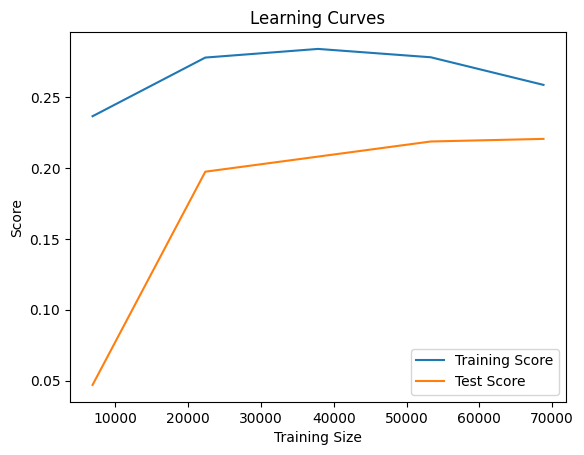

In [41]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

train_sizes, train_scores, test_scores = learning_curve(Ridge(alpha=1), x_scaled, y, cv=10)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Test Score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()


In [42]:
param_grid = {"alpha": np.arange(0, 1, 0.1)}
x_train_scaled = scaler.fit_transform(x_train)

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

print("Best alpha:", grid_search.best_params_["alpha"])

Best alpha: 0.9


In [43]:
best_alpha = grid_search.best_params_["alpha"]
x_test_scaled = scaler.fit_transform(x_test)
train_eval(x_train, y_train, x_test, y_test, best_alpha)

[0.26700825 0.26976405 0.24290923 0.25859541 0.25721759 0.18682547
 0.25693738 0.28062183 0.21875967 0.22785599]


In [44]:
x_real = pd.read_csv('Data/x_real.csv')

In [45]:
x_real

,is_free,total_recommendations,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,lang_Albanian,lang_Amharic,...,developers_6,developers_7,developers_8,developers_9,developers_10,developers_11,developers_12,developers_13,developers_14,developers_15
0,False,9393,1,1,1,1,4,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,False,4098,10,2,2,2,2,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.5
2,False,0,1,1,1,1,2,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,False,6998,5,1,1,1,4,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,False,12461,1,1,1,1,4,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,False,0,2,1,1,1,3,False,False,False,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
844,False,0,8,1,1,3,10,False,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
845,False,0,13,1,1,1,5,False,False,False,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
846,False,0,1,1,1,2,2,False,False,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [46]:
x_real_scaled = scaler.fit_transform(x_real)
x_train_scaled = scaler.fit_transform(x)
ridge = Ridge()
ridge.fit(x_train_scaled, y)
predictions = ridge.predict(x_real_scaled)

In [47]:
x_real

,is_free,total_recommendations,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,lang_Albanian,lang_Amharic,...,developers_6,developers_7,developers_8,developers_9,developers_10,developers_11,developers_12,developers_13,developers_14,developers_15
0,False,9393,1,1,1,1,4,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,False,4098,10,2,2,2,2,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.5
2,False,0,1,1,1,1,2,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,False,6998,5,1,1,1,4,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,False,12461,1,1,1,1,4,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,False,0,2,1,1,1,3,False,False,False,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
844,False,0,8,1,1,3,10,False,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
845,False,0,13,1,1,1,5,False,False,False,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
846,False,0,1,1,1,2,2,False,False,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [48]:
real_price = pd.DataFrame(predictions).apply(lambda x: np.expm1(x))
real_price

,0
0,490.167298
1,1119.181175
2,411.894538
3,1090.324926
4,654.130589
...,...
843,559.087655
844,615.195092
845,583.025874
846,387.533793
